### Import Libraries


In [1]:
# Import warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
!pip install pandas==2.2.2
!pip install matplotlib==3.10.0
!pip install seaborn==0.13.2
!pip install numpy==1.26.4

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [3]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset

In [4]:
!pip install pyarrow
!pip install fastparquet

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [5]:
first_month_data_path = "Datasets_and_Dictionary/trip_records/2023-1.parquet"
df = pd.read_parquet(first_month_data_path)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [6]:
# Extract date and hour from the datetime column
df["pickup_date"] = df["tpep_pickup_datetime"].dt.date
df["pickup_hour"] = df["tpep_pickup_datetime"].dt.hour

# Prepare empty DataFrame for the sampled data
sampled_data = pd.DataFrame()

# Group by date and hour and sample 5% from each group
for (date, hour), hour_data in df.groupby(["pickup_date", "pickup_hour"]):
    sample = hour_data.sample(frac=0.05, random_state=42)
    sampled_data = pd.concat([sampled_data, sample])

sampled_data.reset_index(drop=True, inplace=True)

In [7]:
print("Original data points:", len(df))
print("Sampled data points :", len(sampled_data))


Original data points: 3041714
Sampled data points : 152087


In [4]:
import os

In [6]:
# Folder containing your monthly trip data
data_dir = 'Datasets_and_Dictionary/trip_records/'
file_list = os.listdir(data_dir)

# Final output file
output_file = 'Datasets_and_Dictionary/sampled_yearly_data.csv'

# Write header flag
write_header = True

# Process one file at a time to conserve memory
for file_name in file_list:
    try:
        file_path = os.path.join(data_dir, file_name)

        # Read the file in chunks (optional if files are very large)
        df_month = pd.read_parquet(file_path)
        df_month['tpep_pickup_datetime'] = pd.to_datetime(df_month['tpep_pickup_datetime'])

        # Add date and hour columns
        df_month['pickup_date'] = df_month['tpep_pickup_datetime'].dt.date
        df_month['pickup_hour'] = df_month['tpep_pickup_datetime'].dt.hour

        # Group and sample
        grouped = df_month.groupby(['pickup_date', 'pickup_hour'])

        sampled_chunks = []
        for _, hour_data in grouped:
            if len(hour_data) > 0:
                sample = hour_data.sample(frac=0.05, random_state=42)
                sampled_chunks.append(sample)

        # Concatenate all sampled chunks for the month
        sampled_data = pd.concat(sampled_chunks)

        # Append to output CSV incrementally 
        sampled_data.to_csv(output_file, mode='a', index=False, header=write_header)
        write_header = False  

        print(f"Processed {file_name}, sampled: {len(sampled_data)} rows")

        # Free memory
        del df_month, sampled_data, sampled_chunks

    except Exception as e:
        print(f"Error processing {file_name}: {e}")


Processed 2023-10.parquet, sampled: 174255 rows
Processed 2023-4.parquet, sampled: 139641 rows
Processed 2023-6.parquet, sampled: 162910 rows
Processed 2023-2.parquet, sampled: 168696 rows
Processed 2023-12.parquet, sampled: 166709 rows
Processed 2023-3.parquet, sampled: 163786 rows
Processed 2023-9.parquet, sampled: 140875 rows
Processed 2023-7.parquet, sampled: 174068 rows
Processed 2023-1.parquet, sampled: 152087 rows
Processed 2023-8.parquet, sampled: 143782 rows
Processed 2023-11.parquet, sampled: 165133 rows
Processed 2023-5.parquet, sampled: 144458 rows


In [4]:
file = 'Datasets_and_Dictionary/sampled_yearly_data.csv'
sampled_data_yearly_data = pd.read_csv(file, low_memory=False)
len(sampled_data_yearly_data)

20860410

In [11]:
sampled_data_yearly_data.info()
sampled_data_yearly_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20860410 entries, 0 to 20860409
Data columns (total 21 columns):
 #   Column                 Dtype 
---  ------                 ----- 
 0   VendorID               object
 1   tpep_pickup_datetime   object
 2   tpep_dropoff_datetime  object
 3   passenger_count        object
 4   trip_distance          object
 5   RatecodeID             object
 6   store_and_fwd_flag     object
 7   PULocationID           object
 8   DOLocationID           object
 9   payment_type           object
 10  fare_amount            object
 11  extra                  object
 12  mta_tax                object
 13  tip_amount             object
 14  tolls_amount           object
 15  improvement_surcharge  object
 16  total_amount           object
 17  congestion_surcharge   object
 18  Airport_fee            object
 19  pickup_date            object
 20  pickup_hour            object
dtypes: object(21)
memory usage: 3.3+ GB


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,pickup_date,pickup_hour
0,2,2023-09-30 23:58:17,2023-10-01 00:14:56,5.0,2.45,1.0,N,79,164,1,...,1.0,0.5,4.4,0.0,1.0,26.4,2.5,0.0,2023-09-30,23
1,2,2023-09-30 23:58:00,2023-10-01 00:09:32,1.0,2.07,1.0,N,211,68,1,...,1.0,0.5,0.0,0.0,1.0,17.8,2.5,0.0,2023-09-30,23
2,2,2023-10-01 00:23:53,2023-10-01 00:39:27,1.0,3.24,1.0,N,148,97,1,...,1.0,0.5,5.85,0.0,1.0,29.25,2.5,0.0,2023-10-01,0
3,1,2023-10-01 00:50:53,2023-10-01 01:02:20,NaN,0.0,NaN,NaN,79,231,0,...,0.0,0.5,0.0,0.0,1.0,22.17,NaN,NaN,2023-10-01,0
4,2,2023-10-01 00:29:10,2023-10-01 00:44:05,1.0,3.3,1.0,N,141,74,2,...,1.0,0.5,0.0,0.0,1.0,22.7,2.5,0.0,2023-10-01,0


In [5]:
sampled_data_yearly_data.isnull().sum()

VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          713614
trip_distance                 0
RatecodeID               713614
store_and_fwd_flag       713614
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge     713614
Airport_fee              713614
pickup_date                   0
pickup_hour                   0
dtype: int64

In [8]:
# Drop rows where 'RatecodeID' is NaN
cleaned_data = sampled_data_yearly_data.dropna(subset=['RatecodeID'])
# print(cleaned_data.head())
# print(cleaned_data.tail())
print(cleaned_data.isnull().sum())

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
Airport_fee              0
pickup_date              0
pickup_hour              0
dtype: int64


In [9]:
# remove following columns - 'VendorID','RatecodeID','store_and_fwd_flag'
cleaned_data = cleaned_data.drop(columns=['VendorID','store_and_fwd_flag'])
# print data head
cleaned_data.head()


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,pickup_date,pickup_hour
0,2023-09-30 23:58:17,2023-10-01 00:14:56,5.0,2.45,1.0,79,164,1,17.0,1.0,0.5,4.4,0.0,1.0,26.4,2.5,0.0,2023-09-30,23
1,2023-09-30 23:58:00,2023-10-01 00:09:32,1.0,2.07,1.0,211,68,1,12.8,1.0,0.5,0.0,0.0,1.0,17.8,2.5,0.0,2023-09-30,23
2,2023-10-01 00:23:53,2023-10-01 00:39:27,1.0,3.24,1.0,148,97,1,18.4,1.0,0.5,5.85,0.0,1.0,29.25,2.5,0.0,2023-10-01,0
4,2023-10-01 00:29:10,2023-10-01 00:44:05,1.0,3.3,1.0,141,74,2,17.7,1.0,0.5,0.0,0.0,1.0,22.7,2.5,0.0,2023-10-01,0
5,2023-10-01 00:18:30,2023-10-01 00:24:46,1.0,0.93,1.0,79,107,1,7.9,1.0,0.5,2.58,0.0,1.0,15.48,2.5,0.0,2023-10-01,0


In [58]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20146796 entries, 0 to 20860409
Data columns (total 19 columns):
 #   Column                 Dtype 
---  ------                 ----- 
 0   tpep_pickup_datetime   object
 1   tpep_dropoff_datetime  object
 2   passenger_count        object
 3   trip_distance          object
 4   RatecodeID             object
 5   PULocationID           object
 6   DOLocationID           object
 7   payment_type           object
 8   fare_amount            object
 9   extra                  object
 10  mta_tax                object
 11  tip_amount             object
 12  tolls_amount           object
 13  improvement_surcharge  object
 14  total_amount           object
 15  congestion_surcharge   object
 16  Airport_fee            object
 17  pickup_date            object
 18  pickup_hour            object
dtypes: object(19)
memory usage: 3.0+ GB


In [10]:
cleaned_data = cleaned_data[cleaned_data['tpep_pickup_datetime'] != 'tpep_pickup_datetime']

cleaned_data['tpep_pickup_datetime'] = pd.to_datetime(
    cleaned_data['tpep_pickup_datetime'],
    errors='coerce',
    infer_datetime_format=True
)
cleaned_data['tpep_dropoff_datetime'] = pd.to_datetime(
    cleaned_data['tpep_dropoff_datetime'],
    errors='coerce',
    infer_datetime_format=True
)

# Convert numeric columns
#    – integers: VendorID, PULocationID, DOLocationID, payment_type
#    – floats: everything else that’s numeric
int_cols   = ['passenger_count', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type', 'pickup_hour']
float_cols = [
    'trip_distance', 'fare_amount', 'extra', 'mta_tax',
    'tip_amount', 'tolls_amount', 'improvement_surcharge',
    'total_amount', 'congestion_surcharge', 'Airport_fee'
]

# Coerce errors to NaN, then cast
for col in int_cols:
    cleaned_data[col] = pd.to_numeric(cleaned_data[col], errors='coerce').astype('Int64')

for col in float_cols:
    cleaned_data[col] = pd.to_numeric(cleaned_data[col], errors='coerce').astype('float64')

# Verify the final schema
print(cleaned_data.dtypes)


tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   Int64
trip_distance                   float64
RatecodeID                        Int64
PULocationID                      Int64
DOLocationID                      Int64
payment_type                      Int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
Airport_fee                     float64
pickup_date                      object
pickup_hour                       Int64
dtype: object


In [15]:
# print missing values for each column 
cleaned_data.isnull().sum(axis=0).reset_index()

,index,0
0,tpep_pickup_datetime,0
1,tpep_dropoff_datetime,0
2,passenger_count,0
3,trip_distance,0
4,RatecodeID,0
5,PULocationID,0
6,DOLocationID,0
7,payment_type,0
8,fare_amount,0
9,extra,0


In [10]:
# Boolean mask of negative fares
neg_fare_mask = cleaned_data['fare_amount'] < 0

# Count how many
num_neg_fares = neg_fare_mask.sum()
print(f"Number of negative fare_amount entries: {num_neg_fares}")


Number of negative fare_amount entries: 0


In [11]:
# Filter down to only negative-fare rows
neg_fares = cleaned_data.loc[neg_fare_mask, ['RatecodeID', 'fare_amount']]

# Summarize by RatecodeID
ratecode_summary = (
    neg_fares
    .groupby('RatecodeID')['fare_amount']
    .agg(
        negative_count='count',
        negative_sum='sum',
        average_negative='mean'
    )
    .reset_index()
)

print("Negative-fare summary by RatecodeID:")
print(ratecode_summary)


Negative-fare summary by RatecodeID:
Empty DataFrame
Columns: [RatecodeID, negative_count, negative_sum, average_negative]
Index: []


In [12]:
# Select all numeric columns
numeric_cols = cleaned_data.select_dtypes(include=['Int64','float64']).columns.tolist()

# Check each for negatives
neg_cols = [col for col in numeric_cols if (cleaned_data[col] < 0).any()]

print("Columns with at least one negative value:")
for col in neg_cols:
    count = (cleaned_data[col] < 0).sum()
    print(f"  • {col}: {count} negative entries")



Columns with at least one negative value:
  • extra: 33 negative entries
  • mta_tax: 803 negative entries
  • improvement_surcharge: 858 negative entries
  • total_amount: 858 negative entries
  • congestion_surcharge: 616 negative entries
  • Airport_fee: 165 negative entries


In [12]:
# Define your fix strategies
fix_map = {
    'total_amount':           'zero_floor', 
    'extra':                 'zero_floor',
    'mta_tax':               'zero_floor',
    'improvement_surcharge': 'zero_floor',
    'congestion_surcharge':  'zero_floor',
    'Airport_fee':           'zero_floor'
}

# Apply fixes
for col, strategy in fix_map.items():
    if col not in cleaned_data.columns:
        continue
    if strategy == 'abs':
        cleaned_data[col] = cleaned_data[col].abs()
    elif strategy == 'zero_floor':
        cleaned_data[col] = cleaned_data[col].clip(lower=0)

# Verify: no more negatives in those columns
for col in fix_map:
    neg_count = (cleaned_data[col] < 0).sum()
    print(f"{col} negatives after fix: {neg_count}")


total_amount negatives after fix: 0
extra negatives after fix: 0
mta_tax negatives after fix: 0
improvement_surcharge negatives after fix: 0
congestion_surcharge negatives after fix: 0
Airport_fee negatives after fix: 0


In [13]:
# Compute the number of missing in each column
missing_counts = cleaned_data.isna().sum()

# Compute the proportion (fraction) of missing values
missing_props = missing_counts / len(cleaned_data)

# Combine into a DataFrame for clarity
missing_summary = (
    pd.DataFrame({
        'missing_count': missing_counts,
        'missing_proportion': missing_props
    })
    .sort_values(by='missing_proportion', ascending=False)
)

print(missing_summary)


                       missing_count  missing_proportion
tpep_pickup_datetime               0                 0.0
mta_tax                            0                 0.0
pickup_date                        0                 0.0
Airport_fee                        0                 0.0
congestion_surcharge               0                 0.0
total_amount                       0                 0.0
improvement_surcharge              0                 0.0
tolls_amount                       0                 0.0
tip_amount                         0                 0.0
extra                              0                 0.0
tpep_dropoff_datetime              0                 0.0
fare_amount                        0                 0.0
payment_type                       0                 0.0
DOLocationID                       0                 0.0
PULocationID                       0                 0.0
RatecodeID                         0                 0.0
trip_distance                  

In [14]:
# unique values
unique_vals = cleaned_data['passenger_count'].unique()
print(unique_vals)

<IntegerArray>
[5, 1, 2, 6, 3, 4, 0, 7, 8, 9]
Length: 10, dtype: Int64


In [18]:
has_nulls = cleaned_data['passenger_count'].isna().any()
print("Any nulls in passenger_count?", has_nulls)


Any nulls in passenger_count? False


In [19]:
has_nulls = cleaned_data['congestion_surcharge'].isna().any()
print("Any nulls in congestion_surcharge?", has_nulls)

Any nulls in congestion_surcharge? False


In [15]:
# Show summary statistics for all numeric columns
numeric_cols = cleaned_data.select_dtypes(include=['Int64','float64']).columns
desc = missing_counts[numeric_cols].describe().T
print("Summary statistics:\n", desc)

Summary statistics:
 count    16.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
dtype: float64


In [16]:
# Compute IQR for each numeric column
Q1 = cleaned_data[numeric_cols].quantile(0.25)
Q3 = cleaned_data[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Flag outliers
outlier_condition = ((cleaned_data[numeric_cols] < (Q1 - 1.5 * IQR)) |
                     (cleaned_data[numeric_cols] > (Q3 + 1.5 * IQR)))

# Count outliers per column
outlier_counts = outlier_condition.sum().rename('outlier_count')
print("Outlier counts per column:\n", outlier_counts)


Outlier counts per column:
 passenger_count          4997322
trip_distance            2662440
RatecodeID               1124937
PULocationID                   0
DOLocationID                   0
payment_type             3730672
fare_amount              2107292
extra                     371261
mta_tax                   189882
tip_amount               1558238
tolls_amount             1635216
improvement_surcharge      17688
total_amount             2366925
congestion_surcharge     1550494
Airport_fee              1770417
pickup_hour                    0
Name: outlier_count, dtype: Int64


In [17]:
cleaned_data.rename(columns={'Airport_fee': 'airport_fee'}, inplace=True)


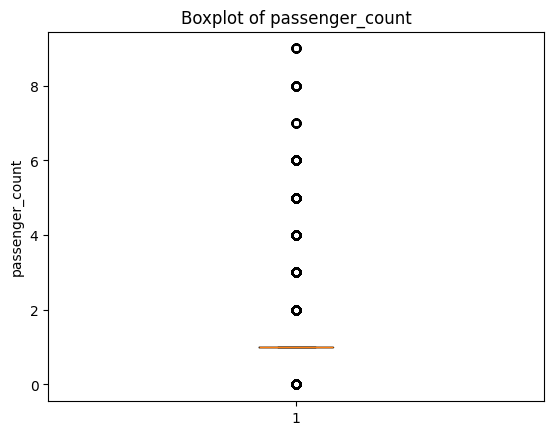

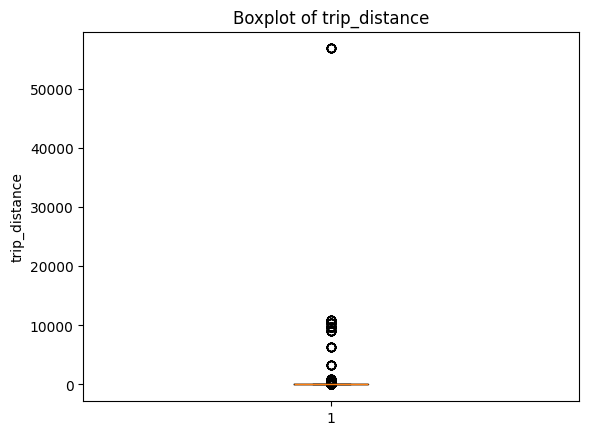

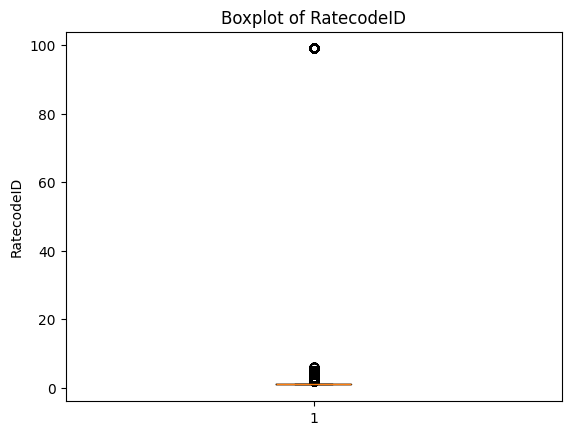

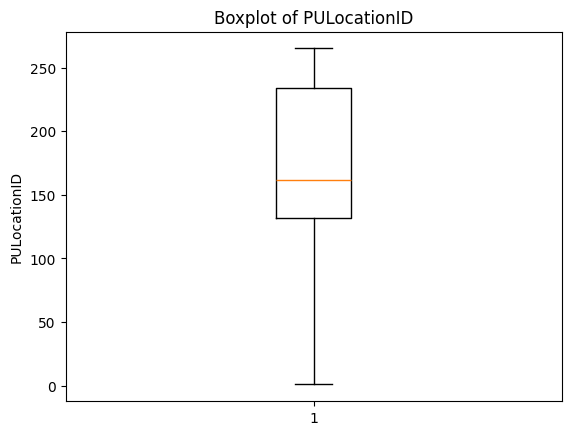

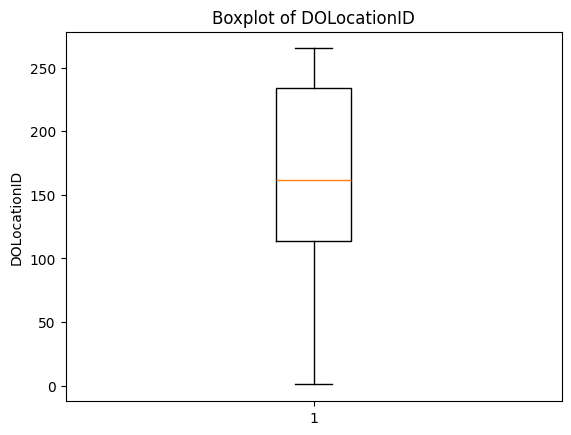

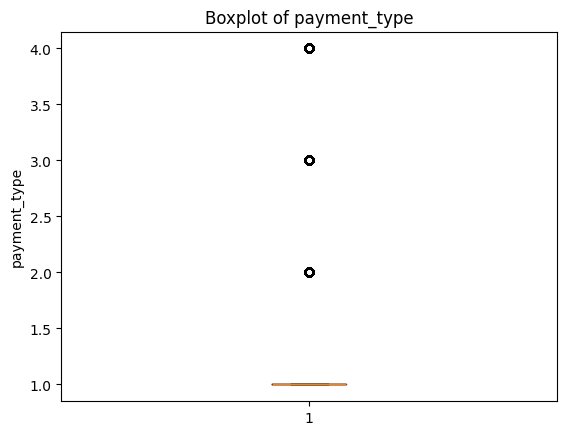

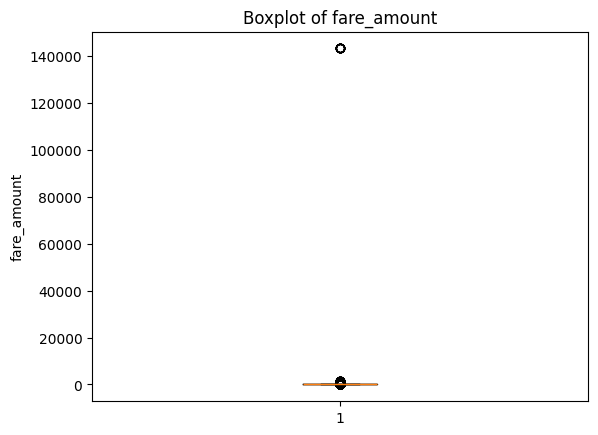

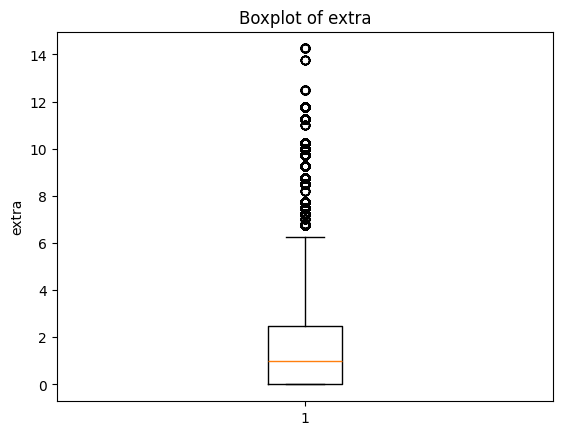

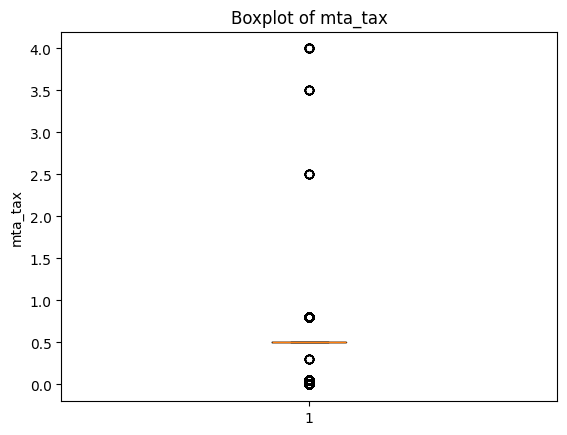

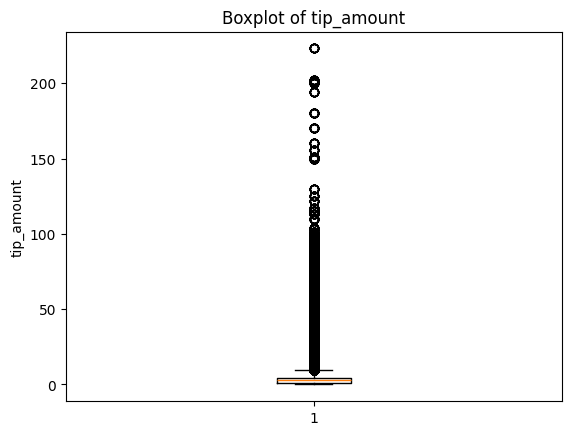

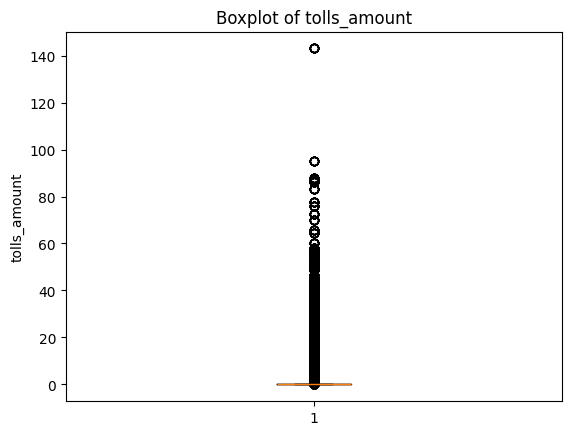

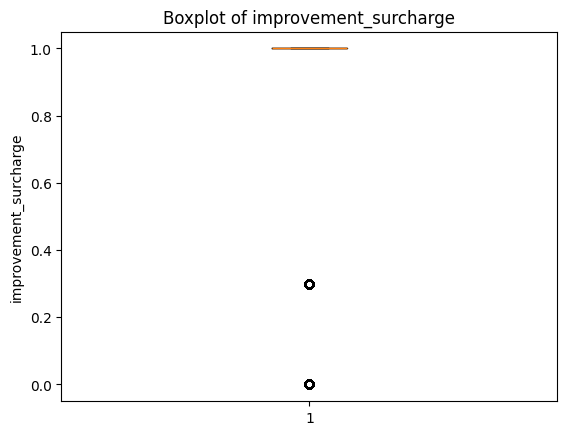

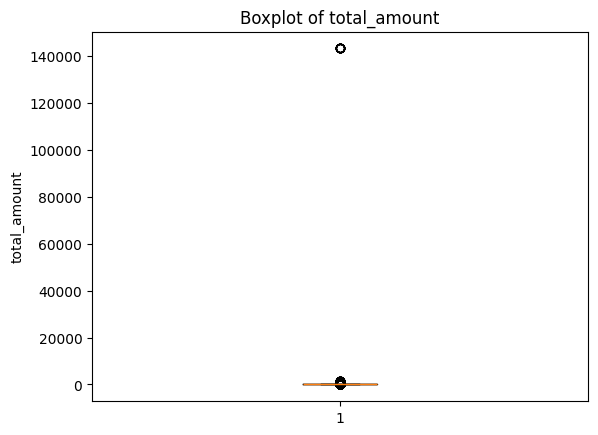

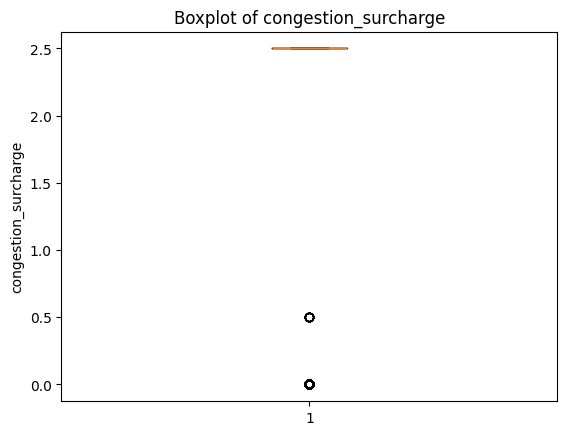

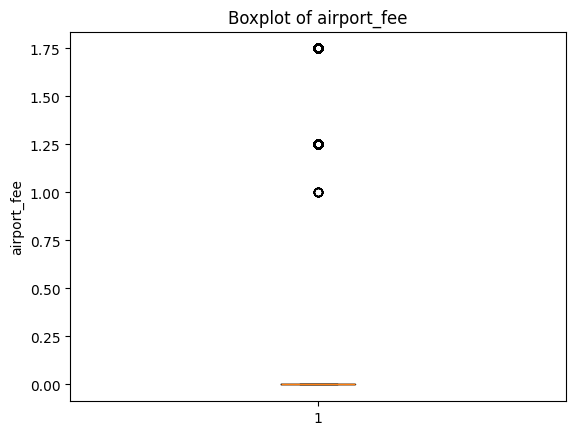

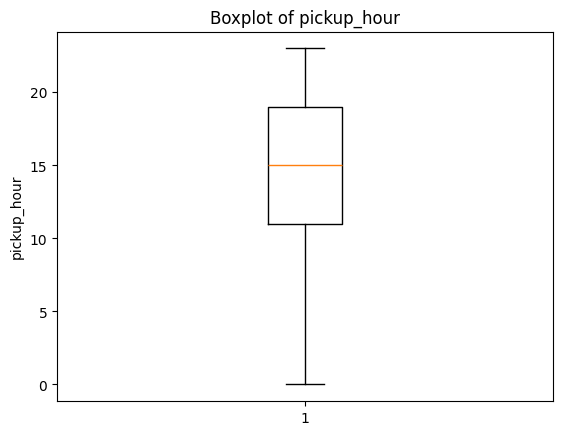

In [21]:
numeric_cols = cleaned_data.select_dtypes(include=['Int64', 'float64']).columns.tolist()

# Create a boxplot for each
for col in numeric_cols:
    plt.figure()
    plt.boxplot(cleaned_data[col].dropna())
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.show()

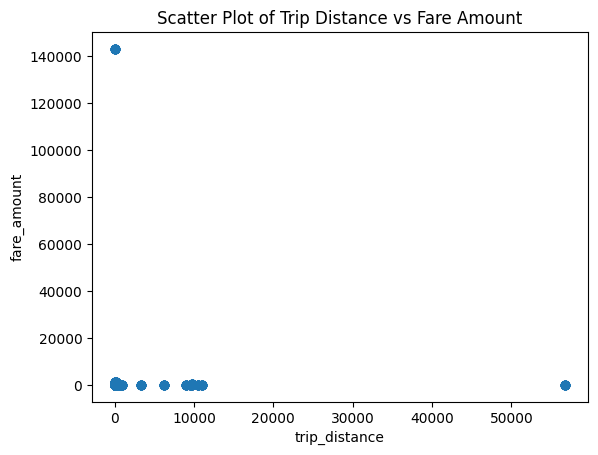

In [13]:
cleaned_data['trip_distance'] = pd.to_numeric(cleaned_data['trip_distance'], errors='coerce')
cleaned_data['fare_amount']  = pd.to_numeric(cleaned_data['fare_amount'],  errors='coerce')

# Drop NaNs
plot_df = cleaned_data.dropna(subset=['trip_distance','fare_amount'])

# Scatter plot
plt.figure()
plt.scatter(plot_df['trip_distance'], plot_df['fare_amount'])
plt.xlabel('trip_distance')
plt.ylabel('fare_amount')
plt.title('Scatter Plot of Trip Distance vs Fare Amount')
plt.show()


In [11]:
cleaned_data['trip_distance'] = pd.to_numeric(cleaned_data['trip_distance'], errors='coerce')
cleaned_data['fare_amount']  = pd.to_numeric(cleaned_data['fare_amount'],  errors='coerce')

# 1. When fare_amount > 140,000 → show trip_distance and fare_amount
high_fares = cleaned_data[cleaned_data['fare_amount'] > 140000][['trip_distance','fare_amount']]
print("Trips with fare_amount > 140,000:")
print(high_fares)

# 2. When trip_distance > 5,000 → show trip_distance and fare_amount
long_trips = cleaned_data[cleaned_data['trip_distance'] > 5000][['trip_distance','fare_amount']]
print("\nTrips with trip_distance > 5,000:")
print(long_trips)


Trips with fare_amount > 140,000:
          trip_distance  fare_amount
992821              0.7    143163.45
2889222             0.7    143163.45
4785623             0.7    143163.45
6682024             0.7    143163.45
8578425             0.7    143163.45
10474826            0.7    143163.45
12371227            0.7    143163.45
14267628            0.7    143163.45
16164029            0.7    143163.45
18060430            0.7    143163.45
19956831            0.7    143163.45

Trips with trip_distance > 5,000:
          trip_distance  fare_amount
255060         56823.80         18.5
485204          9674.01         14.2
531305         10961.43          8.6
805864          9021.10         80.0
952527          6262.99          7.9
...                 ...          ...
20146757        9678.78         47.1
20445075        9717.11        264.8
20459995        9679.36         40.1
20465130        9677.04         52.7
20766586        9673.76          8.6

[165 rows x 2 columns]


In [12]:
# Delete entire rows where trip_distance < 5 and fare_amount > 140000
filtered_df = cleaned_data[~((cleaned_data['trip_distance'] < 5) & (cleaned_data['fare_amount'] > 1300))]

# Count how many rows were deleted
deleted_count = cleaned_data.shape[0] - filtered_df.shape[0]
print(deleted_count)

11


In [13]:
import gc
cleaned_data.drop(cleaned_data.index, inplace=True)
del cleaned_data
gc.collect()

501

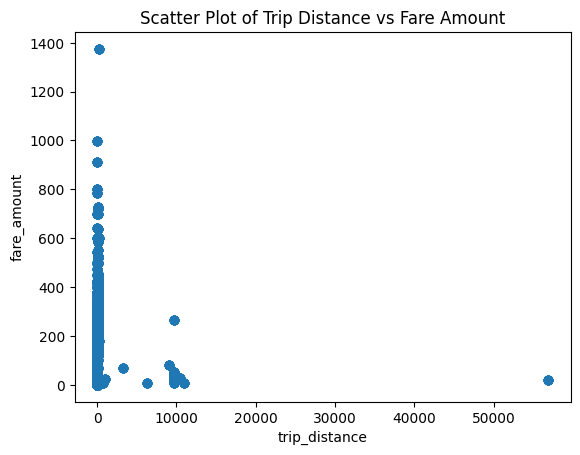

In [27]:
# Scatter plot
plt.figure()
plt.scatter(filtered_df['trip_distance'], filtered_df['fare_amount'])
plt.xlabel('trip_distance')
plt.ylabel('fare_amount')
plt.title('Scatter Plot of Trip Distance vs Fare Amount')
plt.show()


In [17]:
# Remove rows where passenger_count > 6
filtered_df = filtered_df[filtered_df['passenger_count'] <= 6]

In [27]:
# 1. trip_distance nearly 0 and fare_amount > 300
outlier_1 = filtered_df[(filtered_df['trip_distance'] < 0.01) & (filtered_df['fare_amount'] > 300)]

# 2. trip_distance and fare_amount == 0 but different pickup/dropoff zones
outlier_2 = filtered_df[(filtered_df['trip_distance'] == 0) & (filtered_df['fare_amount'] == 0) &
                        (filtered_df['PULocationID'] != filtered_df['DOLocationID'])]

# 3. trip_distance > 250 miles
outlier_3 = filtered_df[filtered_df['trip_distance'] > 250]

# 4. payment_type == 0
outlier_4 = filtered_df[filtered_df['payment_type'] == 0]

# ----------- ADDITIONAL PATTERNS -----------

# 5. Long trip but very low fare
low_fare_long_trip = filtered_df[(filtered_df['trip_distance'] > 10) & (filtered_df['fare_amount'] < 5)]

# Combine all outliers
all_outliers = pd.concat([
    outlier_1, outlier_2, outlier_3, outlier_4, low_fare_long_trip
]).drop_duplicates()

# Show final outlier DataFrame
print("Total Outliers Found:", len(all_outliers))
print(all_outliers)

Total Outliers Found: 257
        tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
47642    2023-10-09 21:36:01   2023-10-09 21:39:15                1   
69646    2023-10-13 18:22:04   2023-10-13 18:22:38                1   
106085   2023-10-20 01:11:27   2023-10-20 01:13:03                1   
175462   2023-08-01 11:12:09   2023-08-01 11:12:09                0   
178769   2023-08-01 22:06:03   2023-08-01 22:06:41                2   
...                      ...                   ...              ...   
1865585  2023-02-23 07:22:13   2023-02-23 07:22:28                1   
1871149  2023-02-24 02:10:01   2023-02-24 02:10:11                1   
1877002  2023-02-25 01:31:31   2023-02-25 01:32:11                1   
1877073  2023-02-25 01:32:58   2023-02-25 01:33:37                1   
1894248  2023-02-28 16:19:44   2023-02-28 16:50:04                1   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
47642             0.00           5       

In [14]:
# value_counts for 'payment_type' column
filtered_df['payment_type'].value_counts()

payment_type
1    16416114
2     3480961
4      150535
3       99165
Name: count, dtype: Int64

In [15]:
# function for mapping numerical payment_type to actual payment
def map_payment_type(x):
    if x==1:
        return 'Credit_card'
    elif x==2:
        return 'Cash'
    elif x==3:
        return 'No_charge'
    elif x==4:
        return 'Dispute'
    elif x==5:
        return 'Unknown'
    else:
        return 'Voided_trip'

# use .apply and lambda on payment_type column to change 'payment_type' column
filtered_df['payment_type'] = filtered_df.payment_type.apply(lambda x:map_payment_type(x))
# print data head
filtered_df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,pickup_date,pickup_hour
0,2023-09-30 23:58:17,2023-10-01 00:14:56,5,2.45,1,79,164,Credit_card,17.0,1.0,0.5,4.40,0.0,1.0,26.40,2.5,0.0,2023-09-30,23
1,2023-09-30 23:58:00,2023-10-01 00:09:32,1,2.07,1,211,68,Credit_card,12.8,1.0,0.5,0.00,0.0,1.0,17.80,2.5,0.0,2023-09-30,23
2,2023-10-01 00:23:53,2023-10-01 00:39:27,1,3.24,1,148,97,Credit_card,18.4,1.0,0.5,5.85,0.0,1.0,29.25,2.5,0.0,2023-10-01,0
4,2023-10-01 00:29:10,2023-10-01 00:44:05,1,3.30,1,141,74,Cash,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0,2023-10-01,0
5,2023-10-01 00:18:30,2023-10-01 00:24:46,1,0.93,1,79,107,Credit_card,7.9,1.0,0.5,2.58,0.0,1.0,15.48,2.5,0.0,2023-10-01,0


In [16]:
filtered_df['tpep_pickup_datetime'] = pd.to_datetime(filtered_df['tpep_pickup_datetime'])
filtered_df['tpep_dropoff_datetime'] = pd.to_datetime(filtered_df['tpep_dropoff_datetime'])


In [17]:
filtered_df['payment_type'] = filtered_df['payment_type'].astype('category')
filtered_df['RatecodeID'] = filtered_df['RatecodeID'].astype('category')


In [24]:
filtered_df['passenger_count'] = filtered_df['passenger_count'].fillna(1).astype(int)
filtered_df = filtered_df[(filtered_df['passenger_count'] >= 1) & (filtered_df['passenger_count'] <= 6)]

filtered_df.columns = [col.strip().lower().replace(" ", "_") for col in filtered_df.columns]

# Final cleaned DataFrame preview
print(filtered_df.head())

  tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  \
0  2023-09-30 23:58:17   2023-10-01 00:14:56                5           2.45   
1  2023-09-30 23:58:00   2023-10-01 00:09:32                1           2.07   
2  2023-10-01 00:23:53   2023-10-01 00:39:27                1           3.24   
4  2023-10-01 00:29:10   2023-10-01 00:44:05                1           3.30   
5  2023-10-01 00:18:30   2023-10-01 00:24:46                1           0.93   

  ratecodeid  pulocationid  dolocationid payment_type  fare_amount  extra  \
0          1            79           164  Credit_card         17.0    1.0   
1          1           211            68  Credit_card         12.8    1.0   
2          1           148            97  Credit_card         18.4    1.0   
4          1           141            74         Cash         17.7    1.0   
5          1            79           107  Credit_card          7.9    1.0   

   mta_tax  tip_amount  tolls_amount  improvement_surcha

In [39]:
filtered_df.columns.tolist()

['tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'ratecodeid',
 'pulocationid',
 'dolocationid',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'pickup_date',
 'pickup_hour']

In [40]:
print(filtered_df.dtypes)

tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
ratecodeid                     category
pulocationid                      Int64
dolocationid                      Int64
payment_type                   category
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
pickup_date                      object
pickup_hour                       Int64
dtype: object


| Variable Name           | Type                       | Reason                                                                                    |
| ----------------------- | -------------------------- | ----------------------------------------------------------------------------------------- |
| `VendorID`              | **Categorical**            | It's a fixed code representing vendor (like 1 or 2) — not a true number                   |
| `tpep_pickup_datetime`  | **Categorical (Datetime)** | Timestamps are not numerical in the traditional sense — use for time series or extraction |
| `tpep_dropoff_datetime` | **Categorical (Datetime)** | Same as above                                                                             |
| `passenger_count`       | **Numerical (Discrete)**   | Count of passengers — numeric, though often treated as discrete                           |
| `trip_distance`         | **Numerical (Continuous)** | A continuous measurement in miles                                                         |
| `RatecodeID`            | **Categorical**            | A code for fare rate types (e.g., standard, JFK flat rate, etc.)                          |
| `PULocationID`          | **Categorical**            | Encodes pickup zone — categorical despite being numeric                                   |
| `DOLocationID`          | **Categorical**            | Same as above                                                                             |
| `payment_type`          | **Categorical**            | Encodes method (e.g., cash, credit)                                                       |
| `pickup_hour`           | **Numerical (Discrete)**   | Numeric (0–23), but can also be treated as a time-based category                          |
| `trip_duration`         | **Numerical (Continuous)** | Derived as difference between dropoff and pickup times                                    |




| Variables                                                                                                                                       | Type                       | Reason                                                                |
| ----------------------------------------------------------------------------------------------------------------------------------------------- | -------------------------- | --------------------------------------------------------------------- |
| `fare_amount`, `extra`, `mta_tax`, `tip_amount`, `tolls_amount`, `improvement_surcharge`, `total_amount`, `congestion_surcharge`, `airport_fee` | **Numerical (Continuous)** | All represent monetary amounts that can be summed, compared, averaged |



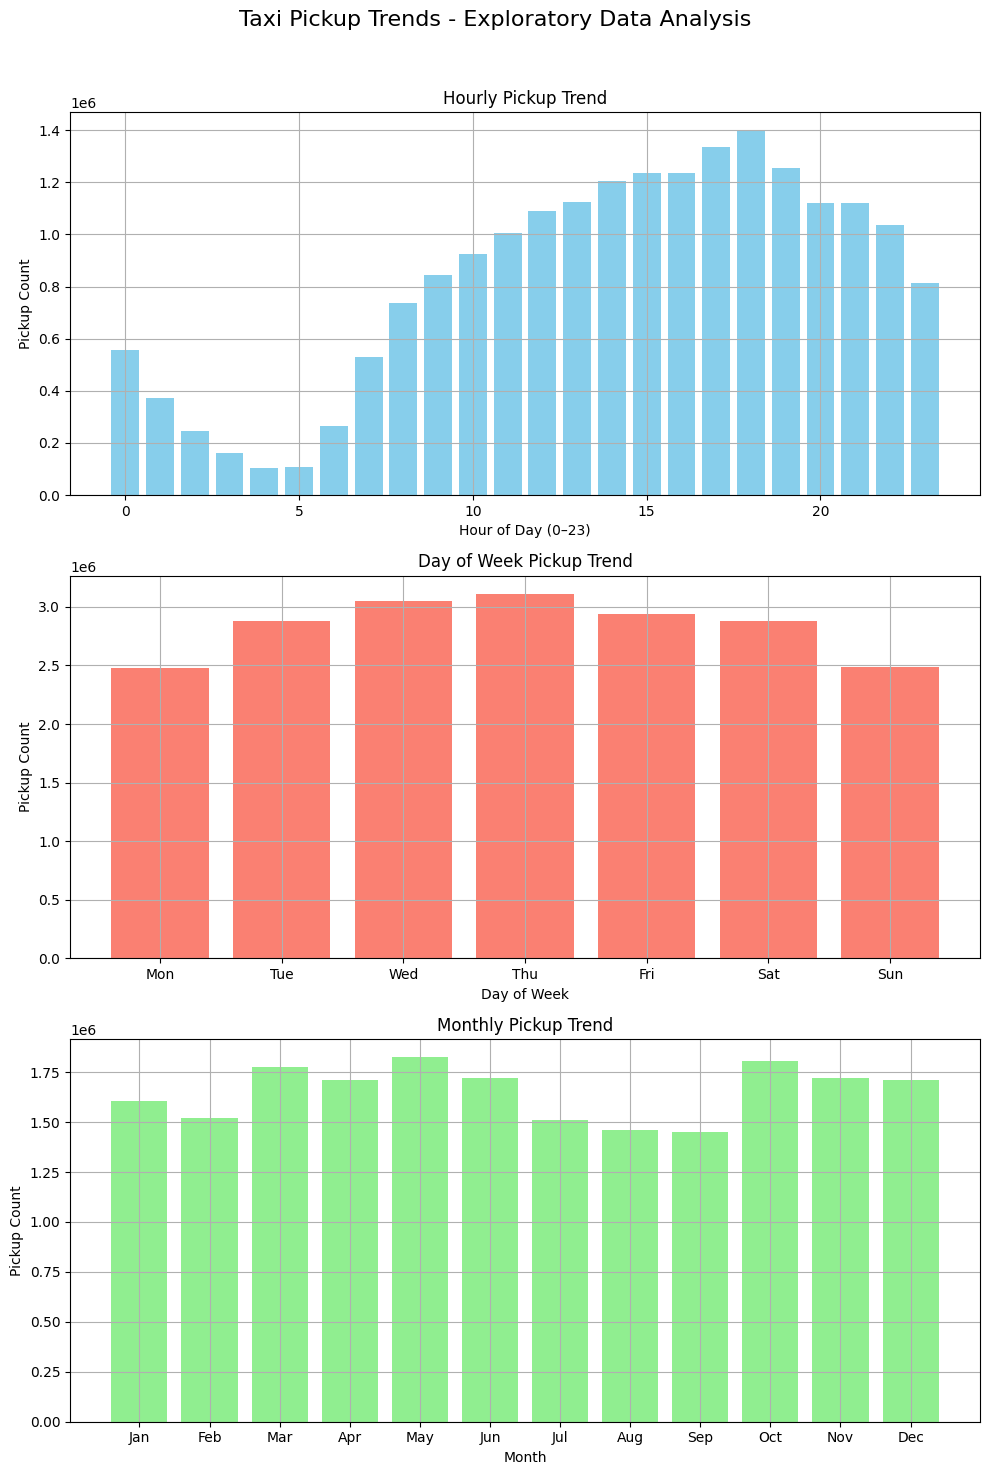

In [31]:
# Extract Hour, Day of Week, Month
filtered_df['pickup_hour'] = filtered_df['tpep_pickup_datetime'].dt.hour
filtered_df['pickup_dayofweek'] = filtered_df['tpep_pickup_datetime'].dt.dayofweek  # 0 = Monday
filtered_df['pickup_month'] = filtered_df['tpep_pickup_datetime'].dt.month  # 1 = January

# Group and count for trends
hourly_trend = filtered_df['pickup_hour'].value_counts().sort_index()
daily_trend = filtered_df['pickup_dayofweek'].value_counts().sort_index()
monthly_trend = filtered_df['pickup_month'].value_counts().sort_index()

# Plot the trends
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
fig.suptitle("Taxi Pickup Trends - Exploratory Data Analysis", fontsize=16)

# Hourly Trend Plot
axes[0].bar(hourly_trend.index, hourly_trend.values, color='skyblue')
axes[0].set_title('Hourly Pickup Trend')
axes[0].set_xlabel('Hour of Day (0–23)')
axes[0].set_ylabel('Pickup Count')
axes[0].grid(True)

# Day of Week Trend Plot
day_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
axes[1].bar(daily_trend.index, daily_trend.values, color='salmon')
axes[1].set_title('Day of Week Pickup Trend')
axes[1].set_xlabel('Day of Week')
axes[1].set_ylabel('Pickup Count')
axes[1].set_xticks(range(7))
axes[1].set_xticklabels(day_labels)
axes[1].grid(True)

# Monthly Trend Plot
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
axes[2].bar(monthly_trend.index, monthly_trend.values, color='lightgreen')
axes[2].set_title('Monthly Pickup Trend')
axes[2].set_xlabel('Month')
axes[2].set_ylabel('Pickup Count')
axes[2].set_xticks(range(1, 13))
axes[2].set_xticklabels(month_labels)
axes[2].grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [24]:
# Check for zero or negative values
zero_or_negative = {
    'fare_amount': filtered_df['fare_amount'].le(0).sum(),
    'tip_amount': filtered_df['tip_amount'].le(0).sum(),
    'total_amount': filtered_df['total_amount'].le(0).sum(),
    'trip_distance': filtered_df['trip_distance'].le(0).sum()
}

# Convert results to DataFrame for display
result_df = pd.DataFrame.from_dict(zero_or_negative, orient='index', columns=['Zero_or_Negative_Count'])

# Print the result
print(result_df)

               Zero_or_Negative_Count
fare_amount                      6567
tip_amount                    4427401
total_amount                     3982
trip_distance                  243419


Yes — creating a copy of the DataFrame without zero/negative values in critical numeric fields is highly beneficial, especially during data cleaning and modeling.

In [25]:
# Create a cleaned copy excluding rows where any key value is zero or negative
clean_df = filtered_df[
    (filtered_df['fare_amount'] > 0) &
    (filtered_df['tip_amount'] > 0) &
    (filtered_df['total_amount'] > 0) &
    (filtered_df['trip_distance'] > 0)
].copy()

print("Original rows:", len(filtered_df))
print("Cleaned rows:", len(clean_df))


Original rows: 19820053
Cleaned rows: 15304091


In [26]:
# Ensure datetime format
clean_df['tpep_pickup_datetime'] = pd.to_datetime(clean_df['tpep_pickup_datetime'])

# Extract month from pickup datetime
clean_df['pickup_month'] = clean_df['tpep_pickup_datetime'].dt.to_period('M')

# Group by month and calculate total revenue
monthly_revenue = clean_df.groupby('pickup_month')['total_amount'].sum().reset_index()

# Rename columns for clarity
monthly_revenue.columns = ['Month', 'Total_Revenue']

# Convert Month to string for better plotting or exporting
monthly_revenue['Month'] = monthly_revenue['Month'].astype(str)

# Print result
print(monthly_revenue)

      Month  Total_Revenue
0   2022-12         148.50
1   2023-01    34859448.69
2   2023-02    33188067.77
3   2023-03    39942561.67
4   2023-04    38696228.34
5   2023-05    42534499.48
6   2023-06    39887376.10
7   2023-07    33853634.10
8   2023-08    32725012.54
9   2023-09    34582828.61
10  2023-10    43148334.79
11  2023-11    40530783.15
12  2023-12    39461778.95


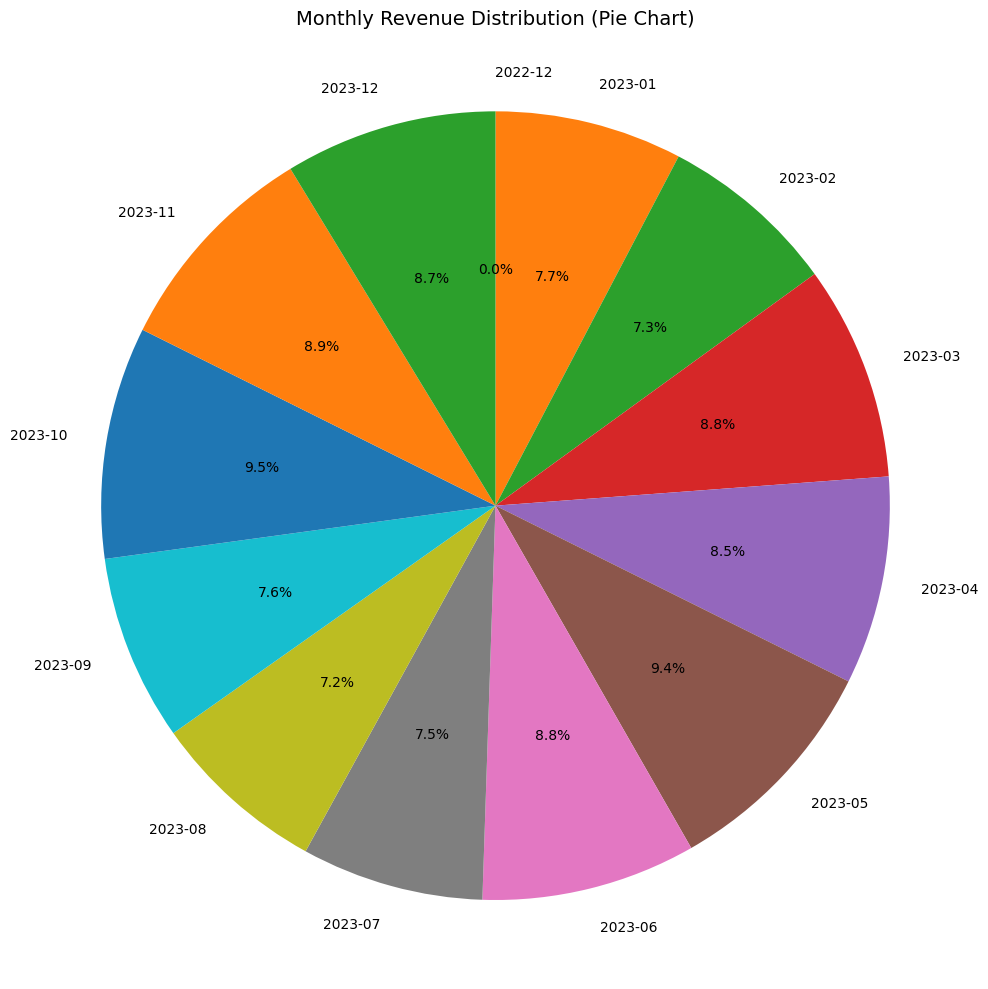

In [41]:
# Plot pie chart
plt.figure(figsize=(10, 10))
plt.pie(
    monthly_revenue['Total_Revenue'],
    labels=monthly_revenue['Month'],
    autopct='%1.1f%%',
    startangle=90,
    counterclock=False
)
plt.title('Monthly Revenue Distribution (Pie Chart)', fontsize=14)
plt.axis('equal') 
plt.tight_layout()
plt.show()

In [36]:
pd.set_option('display.float_format', '{:,.2f}'.format)
monthly_revenue['Month'] = pd.to_datetime(monthly_revenue['Month'])
monthly_revenue['Quarter'] = monthly_revenue['Month'].dt.to_period('Q')
quarterly_revenue = monthly_revenue.groupby('Quarter')['Total_Revenue'].sum().reset_index()
total_revenue = quarterly_revenue['Total_Revenue'].sum()
quarterly_revenue['Proportion (%)'] = (quarterly_revenue['Total_Revenue'] / total_revenue * 100).round(2)
print(quarterly_revenue)

  Quarter  Total_Revenue  Proportion (%)
0  2022Q4         148.50            0.00
1  2023Q1 107,990,078.13           23.82
2  2023Q2 121,118,103.92           26.71
3  2023Q3 101,161,475.25           22.31
4  2023Q4 123,140,896.89           27.16


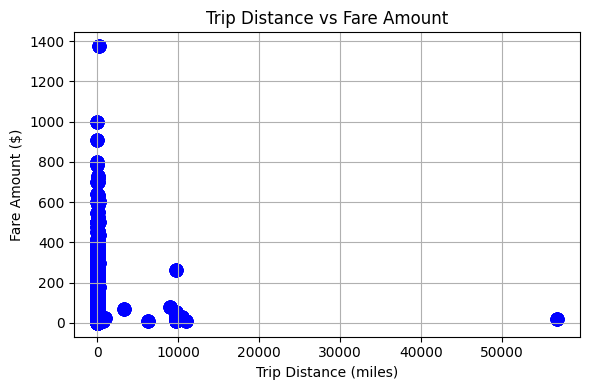

In [39]:
x = filtered_df['trip_distance']
y = filtered_df['fare_amount']

# Plot
plt.figure(figsize=(6, 4))
plt.scatter(x, y, color='blue', s=80)
plt.title('Trip Distance vs Fare Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [19]:
# Remove rows where trip_distance is 0
filtered_df = filtered_df[filtered_df['trip_distance'] != 0].copy()
print("Any zero trip_distance?", (filtered_df['trip_distance'] == 0).any())

Any zero trip_distance? False


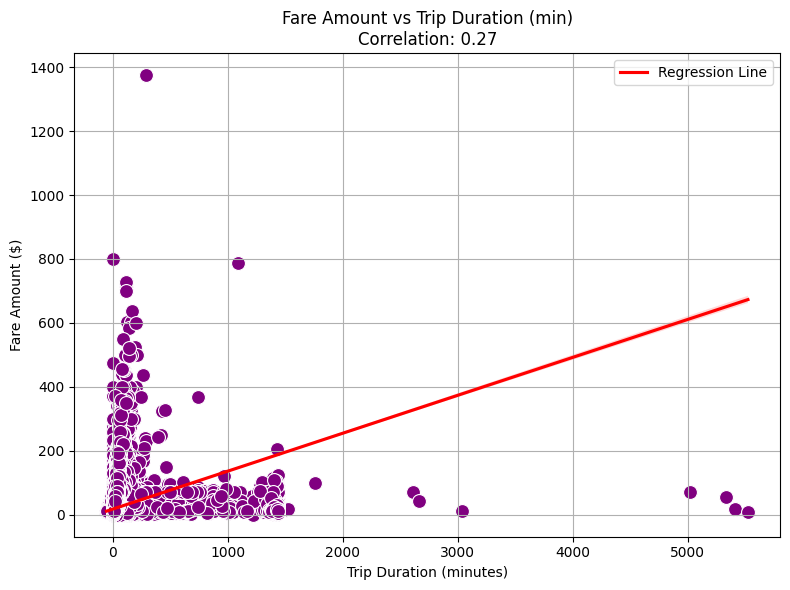

In [42]:
# Calculate trip duration in minutes
filtered_df['trip_duration'] = (filtered_df['tpep_dropoff_datetime'] - filtered_df['tpep_pickup_datetime']).dt.total_seconds() / 60

# Correlation
correlation = filtered_df['fare_amount'].corr(filtered_df['trip_duration'])

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=filtered_df, x='trip_duration', y='fare_amount', color='purple', s=100)
sns.regplot(data=filtered_df, x='trip_duration', y='fare_amount', scatter=False, color='red', label='Regression Line')
plt.title(f'Fare Amount vs Trip Duration (min)\nCorrelation: {correlation:.2f}')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

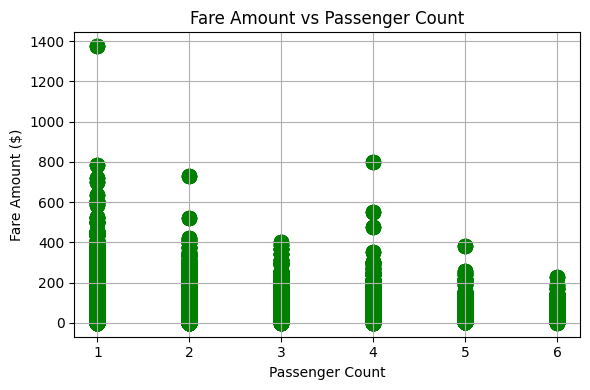

In [38]:
plt.figure(figsize=(6, 4))
plt.scatter(filtered_df['passenger_count'], filtered_df['fare_amount'], color='green', s=100)
plt.title('Fare Amount vs Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

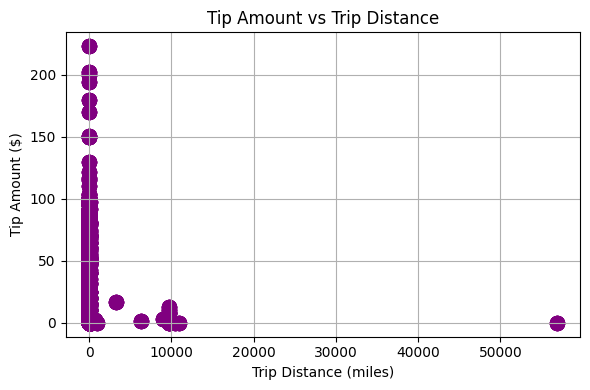

In [39]:
plt.figure(figsize=(6, 4))
plt.scatter(filtered_df['trip_distance'], filtered_df['tip_amount'], color='purple', s=100)
plt.title('Tip Amount vs Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')
plt.grid(True)
plt.tight_layout()
plt.show()


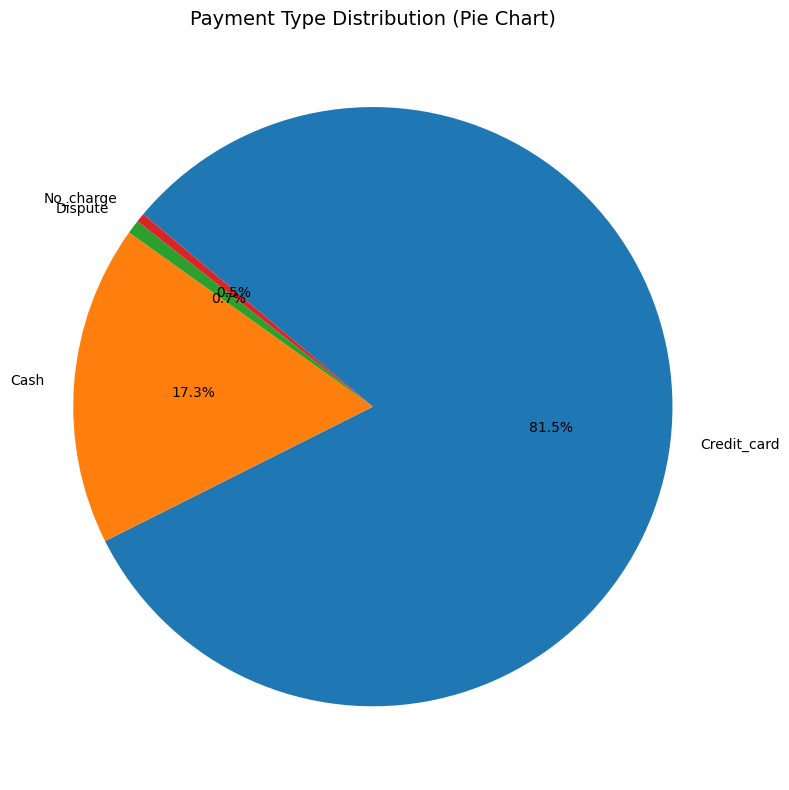

In [20]:
# Count frequency of each payment type
payment_counts = filtered_df['payment_type'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    payment_counts,
    labels=payment_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    counterclock=False
)
plt.title('Payment Type Distribution (Pie Chart)', fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()

In [20]:
!pip install geopandas

Defaulting to user installation because normal site-packages is not writeable


In [21]:
import geopandas as gpd
# Read the shapefile using geopandas
shapefile_path = "Datasets_and_Dictionary/taxi_zones/taxi_zones.shp"
# Read the shapefile
zones_gdf = gpd.read_file(shapefile_path)

# Display first few rows
print(zones_gdf.head())

   OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...  


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

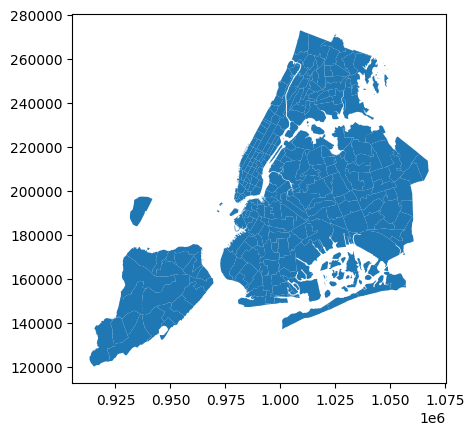

In [22]:
print(zones_gdf.info())
zones_gdf.plot()

In [25]:
filtered_df.head()


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pickup_date,pickup_hour
0,2023-09-30 23:58:17,2023-10-01 00:14:56,5,2.45,1,79,164,Credit_card,17.0,1.0,0.5,4.40,0.0,1.0,26.40,2.5,0.0,2023-09-30,23
1,2023-09-30 23:58:00,2023-10-01 00:09:32,1,2.07,1,211,68,Credit_card,12.8,1.0,0.5,0.00,0.0,1.0,17.80,2.5,0.0,2023-09-30,23
2,2023-10-01 00:23:53,2023-10-01 00:39:27,1,3.24,1,148,97,Credit_card,18.4,1.0,0.5,5.85,0.0,1.0,29.25,2.5,0.0,2023-10-01,0
4,2023-10-01 00:29:10,2023-10-01 00:44:05,1,3.30,1,141,74,Cash,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0,2023-10-01,0
5,2023-10-01 00:18:30,2023-10-01 00:24:46,1,0.93,1,79,107,Credit_card,7.9,1.0,0.5,2.58,0.0,1.0,15.48,2.5,0.0,2023-10-01,0


In [26]:
merged_df = pd.merge(
    filtered_df,
    zones_gdf[['LocationID', 'zone', 'borough']],
    how='left',
    left_on='pulocationid',
    right_on='LocationID'
)

# Step 4: Inspect result
print(merged_df.head())

  tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  \
0  2023-09-30 23:58:17   2023-10-01 00:14:56                5           2.45   
1  2023-09-30 23:58:00   2023-10-01 00:09:32                1           2.07   
2  2023-10-01 00:23:53   2023-10-01 00:39:27                1           3.24   
3  2023-10-01 00:29:10   2023-10-01 00:44:05                1           3.30   
4  2023-10-01 00:18:30   2023-10-01 00:24:46                1           0.93   

  ratecodeid  pulocationid  dolocationid payment_type  fare_amount  extra  \
0          1            79           164  Credit_card         17.0    1.0   
1          1           211            68  Credit_card         12.8    1.0   
2          1           148            97  Credit_card         18.4    1.0   
3          1           141            74         Cash         17.7    1.0   
4          1            79           107  Credit_card          7.9    1.0   

   ...  tolls_amount  improvement_surcharge  total_amoun

In [30]:
# Group by PULocationID and count number of trips
trip_counts = merged_df.groupby('pulocationid').size().reset_index(name='trip_count')

# Optional: merge with zone and borough info for labeling
trip_counts = trip_counts.merge(
    merged_df[['pulocationid', 'zone', 'borough']].drop_duplicates(),
    on='pulocationid',
    how='left'
)

# Preview result
print(trip_counts.sort_values(by='trip_count', ascending=False).head())

     pulocationid  trip_count                   zone    borough
124           132     1034341            JFK Airport     Queens
226           237      935110  Upper East Side South  Manhattan
153           161      924022         Midtown Center  Manhattan
225           236      832876  Upper East Side North  Manhattan
154           162      706002           Midtown East  Manhattan


In [32]:
# Step 1: Rename 'PULocationID' in trip_counts to match 'LocationID' in zones_gdf
trip_counts.rename(columns={'pulocationid': 'LocationID'}, inplace=True)

# Step 2: Merge trip counts with zones GeoDataFrame
zones_with_trips = zones_gdf.merge(
    trip_counts[['LocationID', 'trip_count']],
    on='LocationID',
    how='left'
)

# Step 3: Fill NaNs (zones with no trips) with 0
zones_with_trips['trip_count'] = zones_with_trips['trip_count'].fillna(0).astype(int)

# Step 4: Preview
print(zones_with_trips[['LocationID', 'zone', 'borough', 'trip_count']].head())

   LocationID                     zone        borough  trip_count
0           1           Newark Airport            EWR         517
1           2              Jamaica Bay         Queens          22
2           3  Allerton/Pelham Gardens          Bronx         341
3           4            Alphabet City      Manhattan       19536
4           5            Arden Heights  Staten Island          99


In [33]:
from shapely.geometry import Polygon
# Sample geometries
polygons = [
    Polygon([(0, 0), (1, 0), (1, 1), (0, 1)]),
    Polygon([(1, 0), (2, 0), (2, 1), (1, 1)]),
    Polygon([(0, 1), (1, 1), (1, 2), (0, 2)]),
    Polygon([(1, 1), (2, 1), (2, 2), (1, 2)]),
    Polygon([(2, 0), (3, 0), (3, 1), (2, 1)])
]

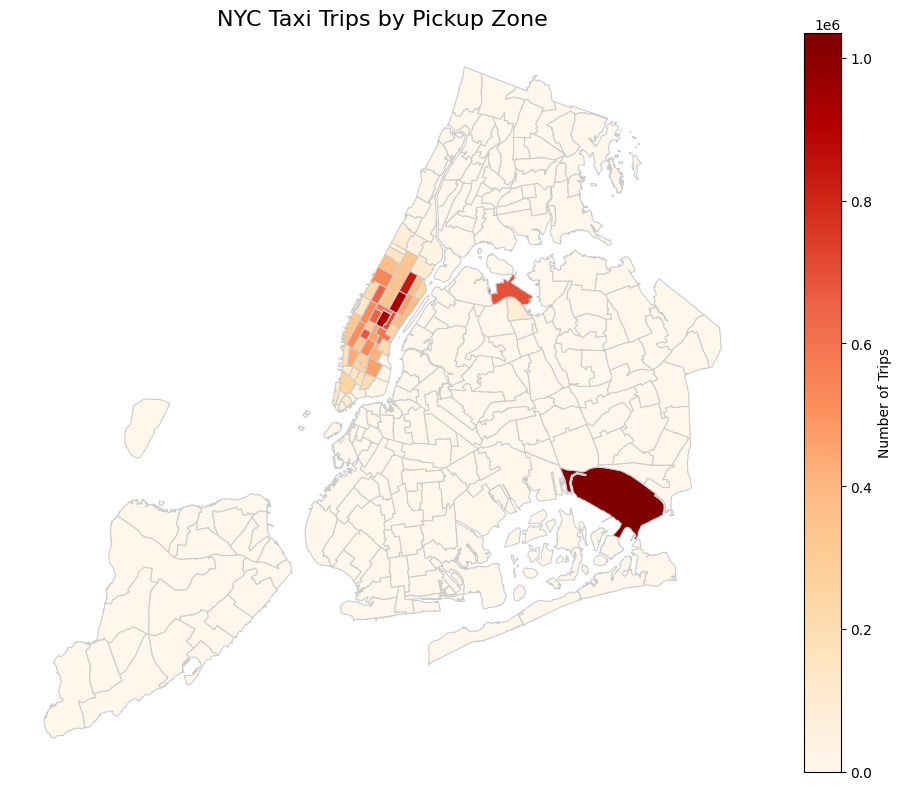

In [34]:
# Merge trip counts into the GeoDataFrame
zones_with_trips = zones_gdf.merge(trip_counts, on='LocationID', how='left')
zones_with_trips['trip_count'] = zones_with_trips['trip_count'].fillna(0).astype(int)

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
zones_with_trips.plot(
    column='trip_count',
    cmap='OrRd',
    linewidth=0.8,
    ax=ax,
    edgecolor='0.8',
    legend=True,
    legend_kwds={'label': "Number of Trips", 'orientation': "vertical"}
)
ax.set_title("NYC Taxi Trips by Pickup Zone", fontsize=16)
ax.axis('off')
plt.tight_layout()
plt.show()

/tmp/ipykernel_32608/375986282.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hourly_counts, x='pickup_hour', y='trip_count', palette='Blues_d')


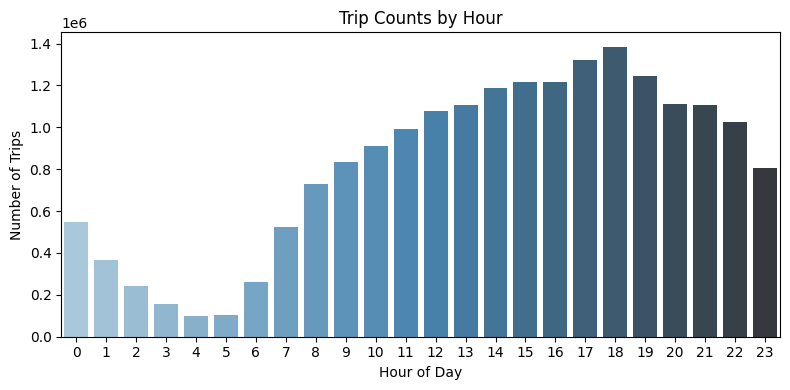

In [35]:
# Trip counts per hour
hourly_counts = merged_df.groupby('pickup_hour').size().reset_index(name='trip_count')

plt.figure(figsize=(8, 4))
sns.barplot(data=hourly_counts, x='pickup_hour', y='trip_count', palette='Blues_d')
plt.title('Trip Counts by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.tight_layout()
plt.show()

In [42]:
merged_df['trip_duration'] = (merged_df['tpep_dropoff_datetime'] - merged_df['tpep_pickup_datetime']).dt.total_seconds() / 60
merged_df['trip_duration_hr'] = merged_df['trip_duration'] / 60
merged_df['route'] = merged_df['pulocationid'].astype(str) + '->' + merged_df['dolocationid'].astype(str)
grouped = merged_df.groupby(['route', 'pickup_hour']).agg(
    avg_distance=('trip_distance', 'mean'),
    avg_duration_hr=('trip_duration_hr', 'mean')
).reset_index()
grouped['avg_speed_mph'] = grouped['avg_distance'] / grouped['avg_duration_hr']
slowest_routes = grouped.sort_values(['pickup_hour', 'avg_speed_mph']) \
                        .groupby('pickup_hour').first().reset_index()
print(slowest_routes)

    pickup_hour     route  avg_distance  avg_duration_hr  avg_speed_mph
0             0   74->116      2.315000        11.448194       0.202215
1             1   164->33      5.683333        -0.007037    -807.631579
2             2  144->100      2.880000        23.613889       0.121962
3             3   45->249      1.660000        11.993889       0.138404
4             4  162->162      0.640000         5.955972       0.107455
5             5  142->142      0.560000        23.559167       0.023770
6             6   70->138      1.490000        17.376111       0.085750
7             7   13->209      0.860000        11.829028       0.072703
8             8    100->7      0.220000         5.573889       0.039470
9             9  113->244      0.420000         4.956389       0.084739
10           10    45->45      0.050000         0.840556       0.059484
11           11   213->32      3.600000        -0.266389     -13.514077
12           12  244->126      3.300000        -0.178333     -18

/tmp/ipykernel_32608/2568394169.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hourly_trip_counts, x='pickup_hour', y='trip_count', palette='crest')


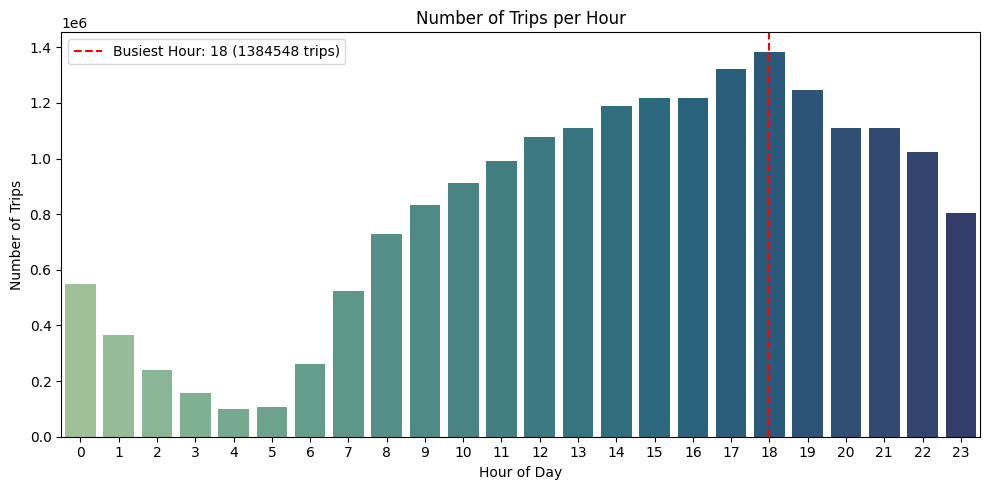

Busiest Hour: 18 with 1384548 trips


In [43]:
# Step 1: Count trips per hour
hourly_trip_counts = merged_df['pickup_hour'].value_counts().sort_index().reset_index()
hourly_trip_counts.columns = ['pickup_hour', 'trip_count']

# Step 2: Identify busiest hour
busiest = hourly_trip_counts.loc[hourly_trip_counts['trip_count'].idxmax()]

# Step 3: Plot hourly trip counts
plt.figure(figsize=(10, 5))
sns.barplot(data=hourly_trip_counts, x='pickup_hour', y='trip_count', palette='crest')
plt.title('Number of Trips per Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.axvline(x=busiest['pickup_hour'], color='red', linestyle='--', label=f"Busiest Hour: {busiest['pickup_hour']} ({busiest['trip_count']} trips)")
plt.legend()
plt.tight_layout()
plt.show()

# Step 4: Print busiest hour info
print(f"Busiest Hour: {busiest['pickup_hour']} with {busiest['trip_count']} trips")

In [44]:
# Step 1: Count trips per hour
hourly_trip_counts = merged_df.groupby('pickup_hour').size().reset_index(name='sampled_trip_count')

# Step 2: Sort to find top 5 busiest hours
top_5_hours = hourly_trip_counts.sort_values(by='sampled_trip_count', ascending=False).head(5).copy()

# Step 3: Fill in your sampling fraction (e.g., 1% sample → 0.01)
sample_fraction = 0.01  # <-- Change this as per your actual sampling rate

# Step 4: Scale up sampled trip counts to estimate actual trips
top_5_hours['estimated_actual_trips'] = top_5_hours['sampled_trip_count'] / sample_fraction

# Step 5: Display results
print("Top 5 Busiest Hours (Scaled to Actual Trips):")
print(top_5_hours)

Top 5 Busiest Hours (Scaled to Actual Trips):
    pickup_hour  sampled_trip_count  estimated_actual_trips
18           18             1384548             138454800.0
17           17             1320935             132093500.0
19           19             1244727             124472700.0
15           15             1218943             121894300.0
16           16             1218822             121882200.0


/tmp/ipykernel_32608/1450932212.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=traffic_trend, x='day_type', y='trip_count', palette='pastel')


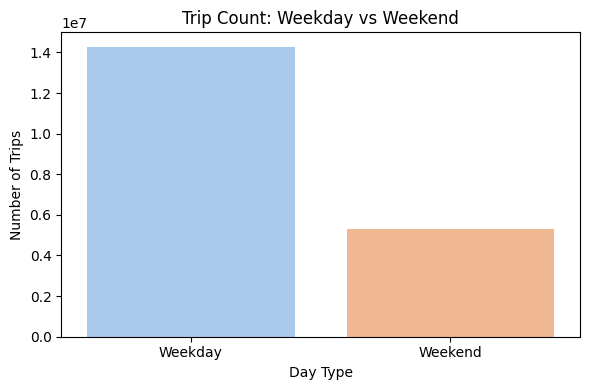

  day_type  trip_count
0  Weekday    14275921
1  Weekend     5301890


In [46]:
merged_df['day_of_week'] = merged_df['tpep_pickup_datetime'].dt.day_name()
merged_df['is_weekend'] = merged_df['tpep_pickup_datetime'].dt.weekday >= 5  
traffic_trend = merged_df['is_weekend'].value_counts().reset_index()
traffic_trend.columns = ['is_weekend', 'trip_count']
traffic_trend['day_type'] = traffic_trend['is_weekend'].map({True: 'Weekend', False: 'Weekday'})
plt.figure(figsize=(6, 4))
sns.barplot(data=traffic_trend, x='day_type', y='trip_count', palette='pastel')
plt.title("Trip Count: Weekday vs Weekend")
plt.xlabel("Day Type")
plt.ylabel("Number of Trips")
plt.tight_layout()
plt.show()
print(traffic_trend[['day_type', 'trip_count']])

In [49]:
# Count top 10 pickup zones
top_pickups = merged_df['pulocationid'].value_counts().head(10).reset_index()
top_pickups.columns = ['LocationID', 'pickup_count']

# Count top 10 dropoff zones
top_dropoffs = merged_df['dolocationid'].value_counts().head(10).reset_index()
top_dropoffs.columns = ['LocationID', 'dropoff_count']

# Merge results for combined view
top_zones = pd.merge(top_pickups, top_dropoffs, on='LocationID', how='outer').fillna(0)
top_zones = top_zones.astype({'pickup_count': 'int', 'dropoff_count': 'int'})

print(top_zones)

    LocationID  pickup_count  dropoff_count
0           68             0         497475
1          132       1034341              0
2          138        693319              0
3          141             0         521653
4          142        653917         553300
5          161        924022         769406
6          162        706002         560703
7          170        585090         584023
8          186        680625              0
9          230        658075         604769
10         236        832876         874720
11         237        935110         833866
12         239             0         551595


In [50]:
# Count pickups and dropoffs per zone
pickup_counts = merged_df['pulocationid'].value_counts().reset_index()
pickup_counts.columns = ['LocationID', 'pickup_count']

dropoff_counts = merged_df['dolocationid'].value_counts().reset_index()
dropoff_counts.columns = ['LocationID', 'dropoff_count']

# Merge the counts
ratios_df = pd.merge(pickup_counts, dropoff_counts, on='LocationID', how='outer').fillna(0)

# Calculate pickup-to-dropoff ratio (avoid division by zero)
ratios_df['pickup_dropoff_ratio'] = ratios_df['pickup_count'] / (ratios_df['dropoff_count'] + 1e-6)

# Get top 10 and bottom 10 zones by ratio
top_10 = ratios_df.sort_values(by='pickup_dropoff_ratio', ascending=False).head(10)
bottom_10 = ratios_df.sort_values(by='pickup_dropoff_ratio', ascending=True).head(10)

# Combine into one DataFrame
top_bottom = pd.concat([top_10, bottom_10]).reset_index(drop=True)

# Display
print(top_bottom)

    LocationID  pickup_count  dropoff_count  pickup_dropoff_ratio
0          199            22              0            22000000.0
1           70         89199           9515              9.374566
2          132       1034341         210386              4.916397
3          138        693319         236357              2.933355
4          186        680625         430298              1.581753
5          114        259743         188320              1.379264
6           43        329395         240108              1.371862
7          249        435512         327701              1.328992
8          162        706002         560703              1.259137
9          161        924022         769406              1.200955
10         245             0            330                   0.0
11         221             0            341                   0.0
12         187             0             77                   0.0
13         176             0            132                   0.0
14        

In [51]:
# Define night hours: 11 PM to 5 AM
night_hours = list(range(0, 6)) + [23]

# Filter rows for night hours
night_df = merged_df[merged_df['pickup_hour'].isin(night_hours)]

# Top 10 pickup zones during night hours
top_night_pickups = night_df['pulocationid'].value_counts().head(10).reset_index()
top_night_pickups.columns = ['LocationID', 'night_pickup_count']

# Top 10 dropoff zones during night hours
top_night_dropoffs = night_df['dolocationid'].value_counts().head(10).reset_index()
top_night_dropoffs.columns = ['LocationID', 'night_dropoff_count']

# Merge both
night_top_zones = pd.merge(top_night_pickups, top_night_dropoffs, on='LocationID', how='outer').fillna(0)
night_top_zones = night_top_zones.astype({'night_pickup_count': 'int', 'night_dropoff_count': 'int'})

# Display result
print(night_top_zones)

    LocationID  night_pickup_count  night_dropoff_count
0           48              112970                73975
1           68               64735                62623
2           79              167244                89276
3          107                   0                61919
4          114               94501                    0
5          132              156035                    0
6          141                   0                56958
7          148              103917                    0
8          164               66077                    0
9          170                   0                67232
10         186               74833                    0
11         229                   0                47168
12         230               88407                49632
13         249              134475                52954
14         263                   0                53757


/tmp/ipykernel_32608/117316291.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fare_analysis, x='passenger_count', y='fare_per_mile_per_passenger', palette='coolwarm')


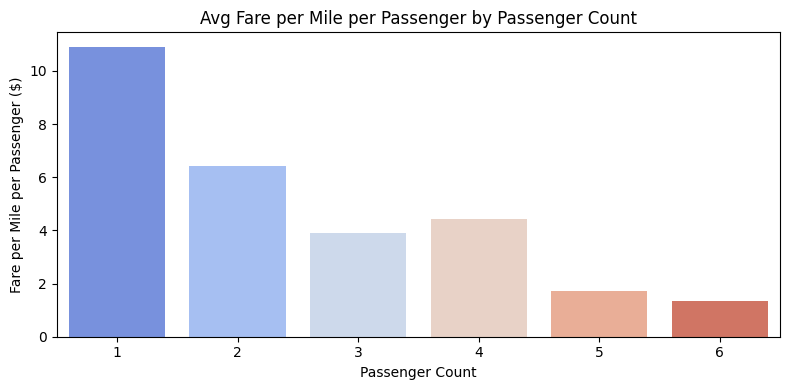

   passenger_count  fare_per_mile_per_passenger
0                1                    10.905854
1                2                     6.434746
2                3                     3.907710
3                4                     4.441977
4                5                     1.709580
5                6                     1.350661


In [52]:
merged_df['fare_per_mile_per_passenger'] = merged_df['fare_amount'] / (
    merged_df['trip_distance'] * merged_df['passenger_count'] + 1e-6)

# Step 3: Group by passenger count
fare_analysis = merged_df.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index()

# Step 4: Plot the result
plt.figure(figsize=(8, 4))
sns.barplot(data=fare_analysis, x='passenger_count', y='fare_per_mile_per_passenger', palette='coolwarm')
plt.title('Avg Fare per Mile per Passenger by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare per Mile per Passenger ($)')
plt.tight_layout()
plt.show()

# Step 5: Show data
print(fare_analysis)

/tmp/ipykernel_32608/3117636213.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fare_by_day, x='day_of_week', y='fare_per_mile', palette='pastel')


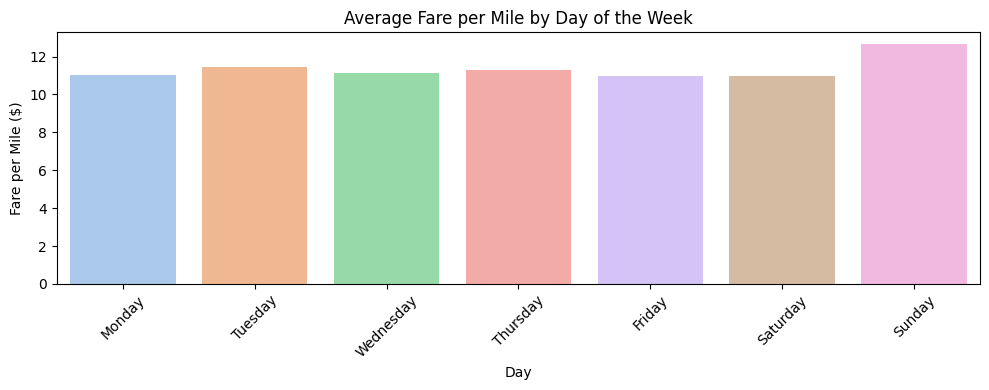

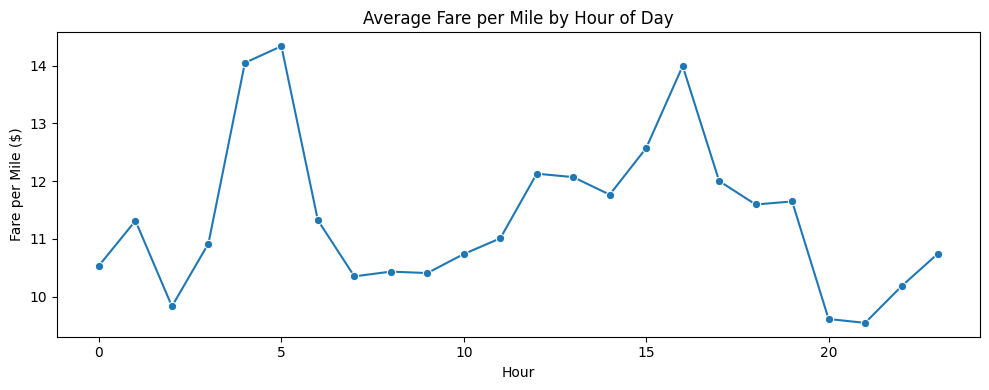

In [55]:
merged_df['tpep_pickup_datetime'] = pd.to_datetime(merged_df['tpep_pickup_datetime'])
merged_df['day_of_week'] = merged_df['tpep_pickup_datetime'].dt.day_name()
merged_df['hour'] = merged_df['tpep_pickup_datetime'].dt.hour
merged_df['fare_per_mile'] = merged_df['fare_amount'] / (merged_df['trip_distance'] + 1e-6)

# Group 1: By day of week
fare_by_day = merged_df.groupby('day_of_week')['fare_per_mile'].mean().reset_index()
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fare_by_day['day_of_week'] = pd.Categorical(fare_by_day['day_of_week'], categories=days_order, ordered=True)
fare_by_day = fare_by_day.sort_values('day_of_week')

# Group 2: By hour
fare_by_hour = merged_df.groupby('hour')['fare_per_mile'].mean().reset_index()

# Plot 1: By Day
plt.figure(figsize=(10, 4))
sns.barplot(data=fare_by_day, x='day_of_week', y='fare_per_mile', palette='pastel')
plt.title('Average Fare per Mile by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Fare per Mile ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 2: By Hour
plt.figure(figsize=(10, 4))
sns.lineplot(data=fare_by_hour, x='hour', y='fare_per_mile', marker='o')
plt.title('Average Fare per Mile by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Fare per Mile ($)')
plt.tight_layout()
plt.show()

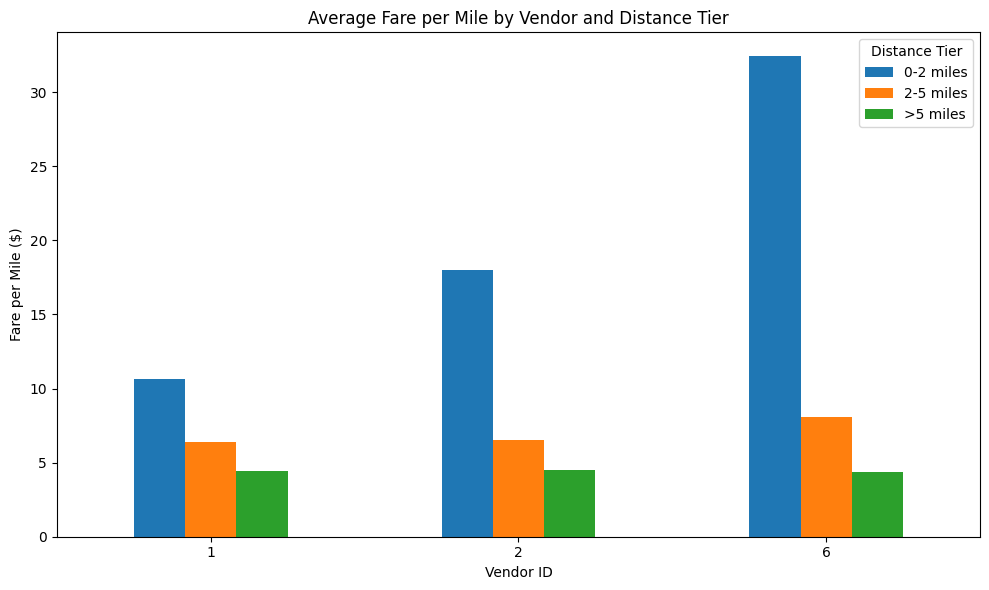

In [5]:
# Step 1: Convert relevant columns to numeric
sampled_data_yearly_data['trip_distance'] = pd.to_numeric(sampled_data_yearly_data['trip_distance'], errors='coerce')
sampled_data_yearly_data['fare_amount'] = pd.to_numeric(sampled_data_yearly_data['fare_amount'], errors='coerce')

# Step 2: Drop rows with zero or missing distance
sampled_data_yearly_data = sampled_data_yearly_data[sampled_data_yearly_data['trip_distance'] > 0]

# Step 3: Define distance tier function
def distance_tier(distance):
    if distance <= 2:
        return '0-2 miles'
    elif distance <= 5:
        return '2-5 miles'
    else:
        return '>5 miles'

# Step 4: Apply tiering
sampled_data_yearly_data['distance_tier'] = sampled_data_yearly_data['trip_distance'].apply(distance_tier)

# Step 5: Compute fare per mile
sampled_data_yearly_data['fare_per_mile'] = sampled_data_yearly_data['fare_amount'] / sampled_data_yearly_data['trip_distance']

# Step 6: Group by vendorid and distance_tier
vendor_fare_analysis = sampled_data_yearly_data.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().reset_index()

# Step 7: Pivot for easier plotting
vendor_fare_pivot = vendor_fare_analysis.pivot(index='VendorID', columns='distance_tier', values='fare_per_mile')

# Step 8: Plot
vendor_fare_pivot.plot(kind='bar', figsize=(10, 6))
plt.title('Average Fare per Mile by Vendor and Distance Tier')
plt.xlabel('Vendor ID')
plt.ylabel('Fare per Mile ($)')
plt.xticks(rotation=0)
plt.legend(title='Distance Tier')
plt.tight_layout()
plt.show()

/tmp/ipykernel_44758/2464870483.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tip_by_distance = sampled_data_yearly_data.groupby('distance_bin')['tip_percentage'].mean().reset_index()
/tmp/ipykernel_44758/2464870483.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tip_by_distance, x='distance_bin', y='tip_percentage', palette='viridis')
/tmp/ipykernel_44758/2464870483.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tip_by_passenger, x='passenger_count', y='tip_percentage', pa

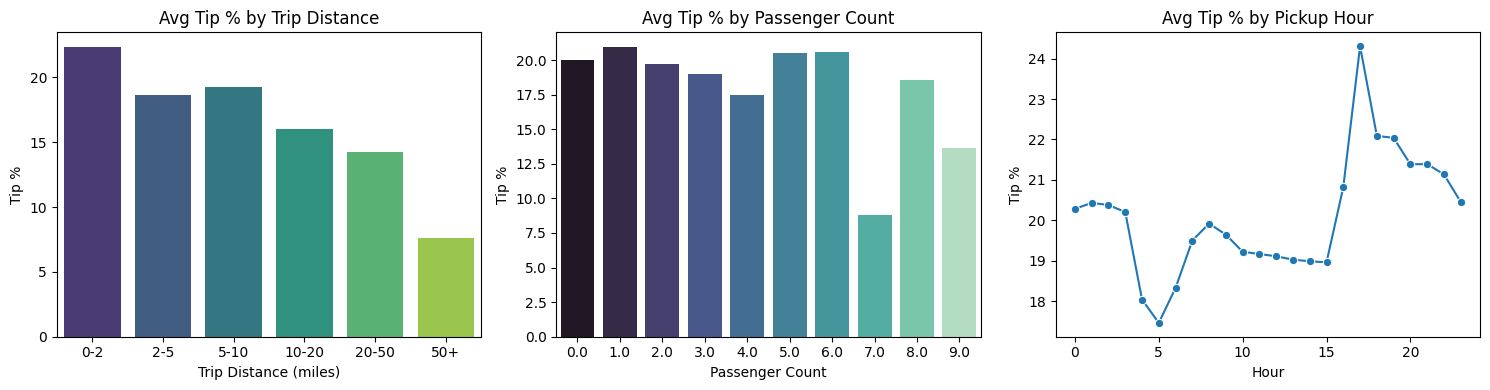

In [6]:
# Step 1: Ensure numeric types
sampled_data_yearly_data['fare_amount'] = pd.to_numeric(sampled_data_yearly_data['fare_amount'], errors='coerce')
sampled_data_yearly_data['tip_amount'] = pd.to_numeric(sampled_data_yearly_data['tip_amount'], errors='coerce')
sampled_data_yearly_data['trip_distance'] = pd.to_numeric(sampled_data_yearly_data['trip_distance'], errors='coerce')
sampled_data_yearly_data['passenger_count'] = pd.to_numeric(sampled_data_yearly_data['passenger_count'], errors='coerce')
sampled_data_yearly_data['pickup_hour'] = pd.to_numeric(sampled_data_yearly_data['pickup_hour'], errors='coerce')

# Step 2: Remove zero or missing fare values
sampled_data_yearly_data = sampled_data_yearly_data[sampled_data_yearly_data['fare_amount'] > 0]

# Step 3: Calculate tip percentage
sampled_data_yearly_data['tip_percentage'] = 100 * sampled_data_yearly_data['tip_amount'] / sampled_data_yearly_data['fare_amount']

# Step 4: Create distance bins
sampled_data_yearly_data['distance_bin'] = pd.cut(
    sampled_data_yearly_data['trip_distance'],
    bins=[0, 2, 5, 10, 20, 50, 100],
    labels=['0-2','2-5','5-10','10-20','20-50','50+']
)

# Step 5: Grouping and averaging
tip_by_distance = sampled_data_yearly_data.groupby('distance_bin')['tip_percentage'].mean().reset_index()
tip_by_passenger = sampled_data_yearly_data.groupby('passenger_count')['tip_percentage'].mean().reset_index()
tip_by_hour = sampled_data_yearly_data.groupby('pickup_hour')['tip_percentage'].mean().reset_index()

# Step 6: Plot
plt.figure(figsize=(15, 4))

# Plot 1: Tip % by Distance Bin
plt.subplot(1, 3, 1)
sns.barplot(data=tip_by_distance, x='distance_bin', y='tip_percentage', palette='viridis')
plt.title('Avg Tip % by Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip %')

# Plot 2: Tip % by Passenger Count
plt.subplot(1, 3, 2)
sns.barplot(data=tip_by_passenger, x='passenger_count', y='tip_percentage', palette='mako')
plt.title('Avg Tip % by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Tip %')

# Plot 3: Tip % by Hour of Day
plt.subplot(1, 3, 3)
sns.lineplot(data=tip_by_hour, x='pickup_hour', y='tip_percentage', marker='o')
plt.title('Avg Tip % by Pickup Hour')
plt.xlabel('Hour')
plt.ylabel('Tip %')

plt.tight_layout()
plt.show()

In [7]:
# Step 1: Describe tip percentage distribution
print("Tip Percentage Distribution Summary:")
print(sampled_data_yearly_data['tip_percentage'].describe())

# Step 2: Filter low and high tip trips
low_tip_trips = sampled_data_yearly_data[sampled_data_yearly_data['tip_percentage'] < 10]
high_tip_trips = sampled_data_yearly_data[sampled_data_yearly_data['tip_percentage'] > 25]

# Step 3: Compare average fare, distance, and passenger count
comparison_df = pd.DataFrame({
    'Metric': ['Average Fare', 'Average Distance', 'Average Passenger Count'],
    'Tip < 10%': [
        low_tip_trips['fare_amount'].mean(),
        low_tip_trips['trip_distance'].mean(),
        low_tip_trips['passenger_count'].mean()
    ],
    'Tip > 25%': [
        high_tip_trips['fare_amount'].mean(),
        high_tip_trips['trip_distance'].mean(),
        high_tip_trips['passenger_count'].mean()
    ]
})

# Step 4: Display result
print("\nComparison of Trips with Tip % < 10 and > 25:")
print(comparison_df)

Tip Percentage Distribution Summary:
count    2.044176e+07
mean     2.048718e+01
std      2.572744e+02
min      0.000000e+00
25%      8.400000e+00
50%      2.390244e+01
75%      2.906977e+01
max      3.500000e+05
Name: tip_percentage, dtype: float64

Comparison of Trips with Tip % < 10 and > 25:
                    Metric  Tip < 10%  Tip > 25%
0             Average Fare  21.963762  14.440567
1         Average Distance   4.458677   2.431227
2  Average Passenger Count   1.412649   1.348096


/tmp/ipykernel_44758/3131302849.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_passenger_by_day, x='day_of_week', y='passenger_count', palette='pastel')


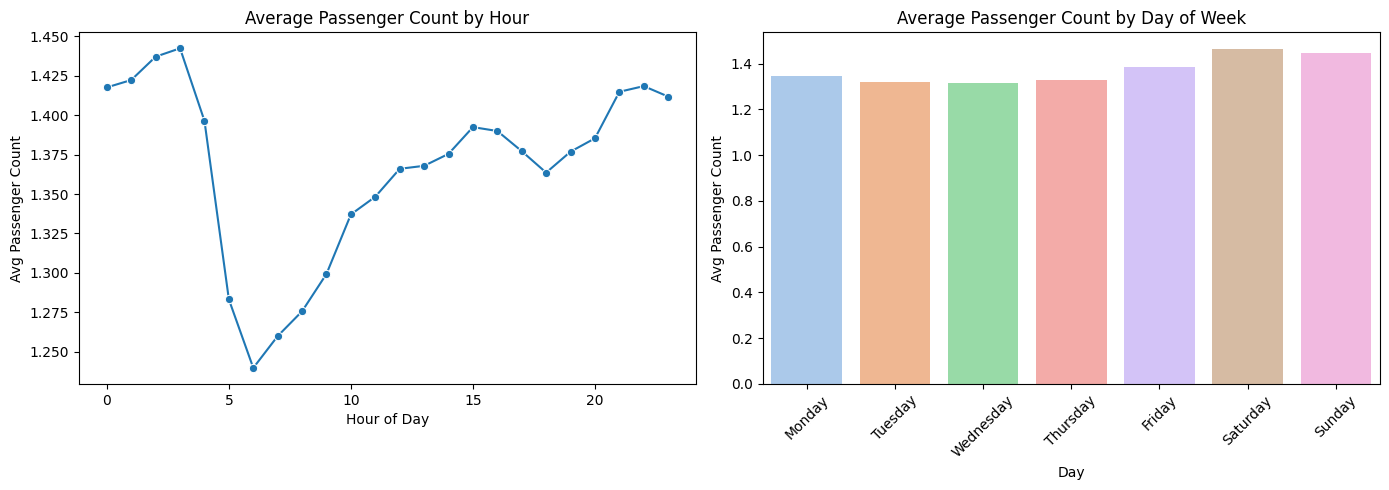

In [8]:
# Convert pickup datetime to datetime type
sampled_data_yearly_data['tpep_pickup_datetime'] = pd.to_datetime(sampled_data_yearly_data['tpep_pickup_datetime'])

# Create new time-based features
sampled_data_yearly_data['pickup_hour'] = sampled_data_yearly_data['tpep_pickup_datetime'].dt.hour
sampled_data_yearly_data['day_of_week'] = sampled_data_yearly_data['tpep_pickup_datetime'].dt.day_name()

# Group by pickup hour
avg_passenger_by_hour = sampled_data_yearly_data.groupby('pickup_hour')['passenger_count'].mean().reset_index()

# Group by day of week
avg_passenger_by_day = sampled_data_yearly_data.groupby('day_of_week')['passenger_count'].mean().reset_index()

# Sort days of week
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_passenger_by_day['day_of_week'] = pd.Categorical(avg_passenger_by_day['day_of_week'], categories=weekday_order, ordered=True)
avg_passenger_by_day = avg_passenger_by_day.sort_values('day_of_week')

# Plotting
plt.figure(figsize=(14, 5))

# Plot 1: Hourly trend
plt.subplot(1, 2, 1)
sns.lineplot(data=avg_passenger_by_hour, x='pickup_hour', y='passenger_count', marker='o')
plt.title('Average Passenger Count by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Avg Passenger Count')

# Plot 2: Daily trend
plt.subplot(1, 2, 2)
sns.barplot(data=avg_passenger_by_day, x='day_of_week', y='passenger_count', palette='pastel')
plt.title('Average Passenger Count by Day of Week')
plt.xlabel('Day')
plt.ylabel('Avg Passenger Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Top 10 Zones by Average Passenger Count:
    LocationID  avg_passenger_count
213          6             1.954545
100        195             1.817204
18          12             1.725707
211         58             1.666667
114        207             1.666667
81         178             1.625000
220         66             1.583710
99         194             1.550000
173        261             1.531095
197         45             1.527183


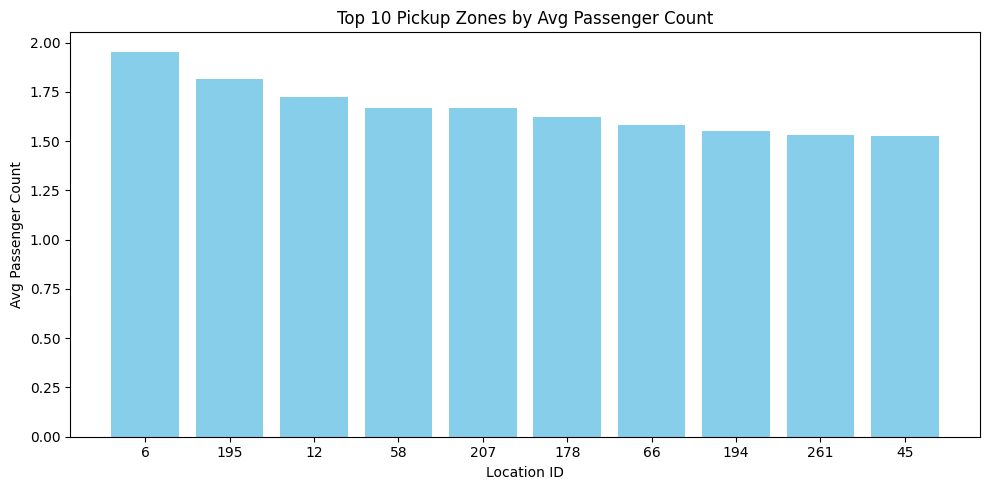

In [10]:
passenger_by_zone = sampled_data_yearly_data.groupby('PULocationID')['passenger_count'].mean().reset_index()
passenger_by_zone.columns = ['LocationID', 'avg_passenger_count']
passenger_by_zone = passenger_by_zone.sort_values(by='avg_passenger_count', ascending=False)
print("\nTop 10 Zones by Average Passenger Count:")
print(passenger_by_zone.head(10))
top_10 = passenger_by_zone.head(10)
plt.figure(figsize=(10, 5))
plt.bar(top_10['LocationID'].astype(str), top_10['avg_passenger_count'], color='skyblue')
plt.title('Top 10 Pickup Zones by Avg Passenger Count')
plt.xlabel('Location ID')
plt.ylabel('Avg Passenger Count')
plt.tight_layout()
plt.show()